# Laboratorio di Simulazione Numerica: lezione 3

Elia Steve, 47122A

In [2]:
import scipy
from scipy.special import erf
import numpy as np
from numpy import exp
from numpy.lib.scimath import log, sqrt

In [3]:
import matplotlib.pyplot as plt

### Esercizio 3.1

In questo esercizio dobbiamo cacolare il valore di un'opzione di tipo call e di tipo put assumendo che lo spot price del bene in questione segua moto browniano geometrico, e confrontare i risultati con quelli esatti del modello di Black e Scholes. Il calcolo consiste nel simulare molte volte l'evoluzione del prezzo del bene, calcolare da questo il valore dell'opzione e alla fine prendere il valor medio. Dato il valore del bene al tempo $t=0,$ ne abbiamo calcolato il valore al tempo $T$ campionando un moto browniano geometrico, in due modi: ottenendo direttamente il valore al tempo $T$ da quello al tempo $0$ (calcolo _diretto_) oppure dividendo l'intervallo di tempo $T$ in $100$ sottointervalli e ottenendo il valore a ciascun tempo $t_{i+1}$ da quello al tempo $t_{i}$ ($0 \leq i < 100$, calcolo _discretizzato_). Ci aspettiamo che i due metodi producano risultati equivalenti. In entrambi i casi stimiamo l'errore sulla media finale con il data blocking, usando $100$ blocchi da $1000$ evoluzioni del prezzo del bene.

Ricopio la casella per il calcolo del valore con il risultato di Black-Scholes:

In [4]:
# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


Disegno il grafico dei valori dell'opzione in funzione del blocco nel caso diretto e discretizzato:

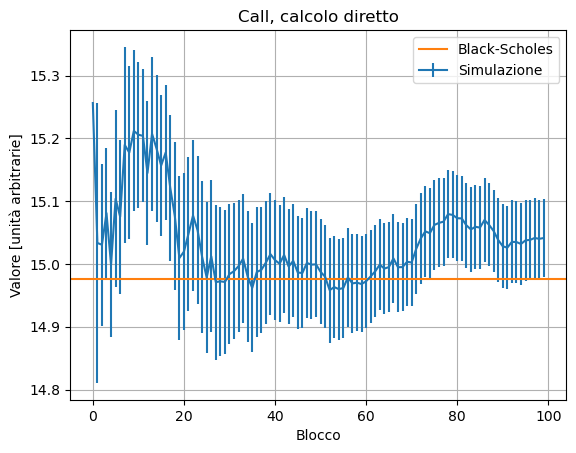

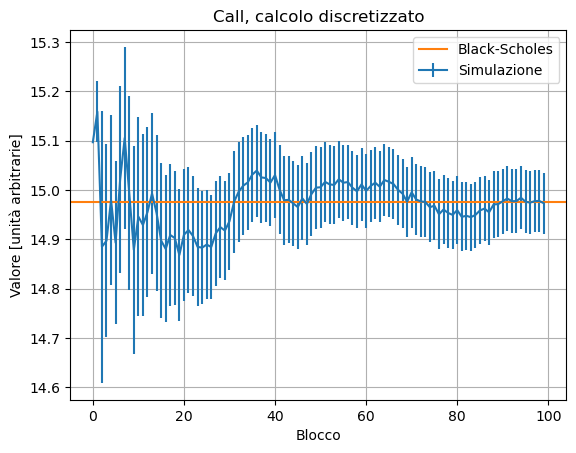

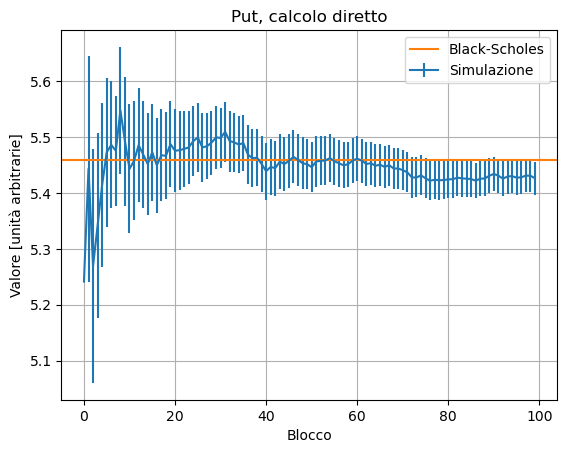

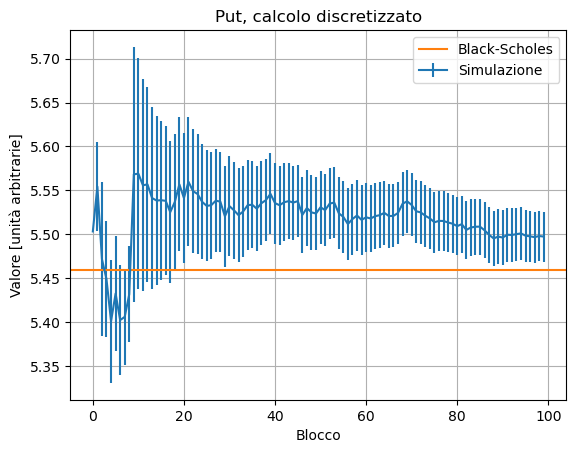

In [15]:
for type, type_str in zip([call, put], ["call", "put"]):
    for title, addition_to_file in zip(["diretto", "discretizzato"], ["direct", "discretized"]):
        means = np.loadtxt(type_str + "_" + addition_to_file + ".dat", usecols=0)
        errors = np.loadtxt(type_str + "_" + addition_to_file + ".dat", usecols=1)
        xs = np.arange(len(means))        
        plt.errorbar(xs, means, yerr=errors, label="Simulazione")
        plt.axhline(y=type, color="tab:orange", label="Black-Scholes")
        plt.grid(True)
        plt.title(type_str.capitalize() + ", calcolo " + title)
        plt.xlabel("Blocco")
        plt.ylabel("Valore [unità arbitrarie]")
        plt.legend()
        plt.show()

Vediamo che in tutti i casi c'è buona compatibilità con la soluzione esatta di Black e Scholes, e che il calcolo diretto e quello discretizzato forniscono risultati equivalenti, con errori al centesimo blocco molto simili.